In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from kneed import KneeLocator
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [85]:
# Carregando o conjunto de dados Iris
iris = load_iris()
x = iris.data
y = iris.target

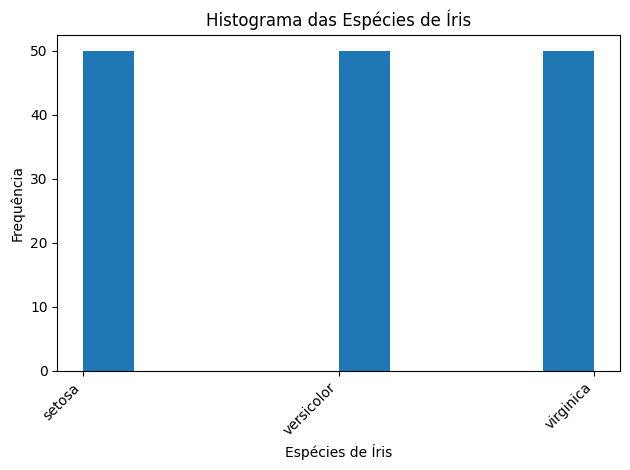

In [104]:
plt.hist(y)

plt.xticks(range(len(set(y))), iris.target_names, rotation=45, ha='right')

# Adicionar rótulos e título
plt.xlabel('Espécies de Íris')
plt.ylabel('Frequência')
plt.title('Histograma das Espécies de Íris')

# Mostrar o histograma
plt.tight_layout()
plt.show()

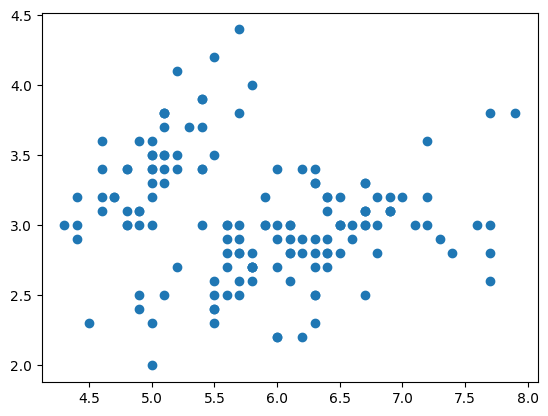

In [86]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

# Testar com 3 e 5 centroids

In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [88]:
centroids = kmeans.cluster_centers_
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

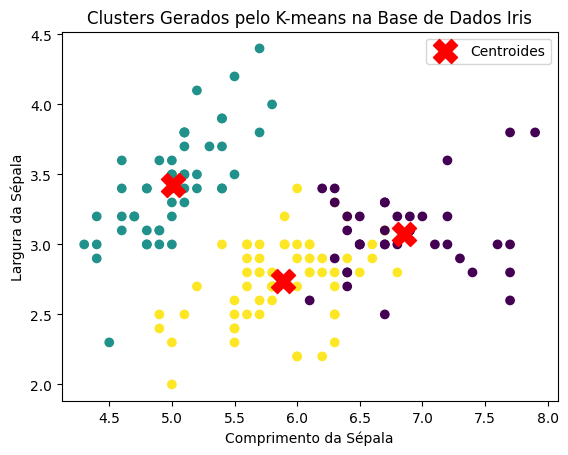

In [89]:
# Plotando os clusters
y_labels = kmeans.labels_
plt.scatter(x[:, 0], x[:, 1], c=y_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='red', label='Centroides')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Clusters Gerados pelo K-means na Base de Dados Iris')
plt.legend()
plt.show()

In [90]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [91]:
centroids = kmeans.cluster_centers_
centroids

array([[6.24722222, 2.84722222, 4.775     , 1.575     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

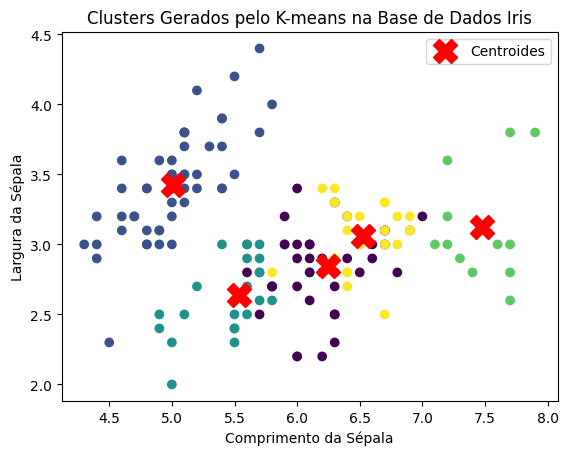

In [92]:
# Plotando os clusters
y_labels = kmeans.labels_
plt.scatter(x[:, 0], x[:, 1], c=y_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='red', label='Centroides')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Clusters Gerados pelo K-means na Base de Dados Iris')
plt.legend()
plt.show()

# Aplicando gráfico de cotovelo para saber qual a quantidade de centroids se encaixa melhor

In [93]:
valores_k = []
inercia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init='auto').fit(x)
    valores_k.append(i)
    inercia.append(kmeans.inertia_)
    print(kmeans.inertia_)

681.3706
152.3479517603579
78.8556658259773
57.255523809523815
46.472230158730156
39.03998724608725
40.39400438596491
33.709608697546
35.16995574849987
26.723520421607383
24.291255485234323
23.912022203895777
23.376250000000002
22.527349045562282


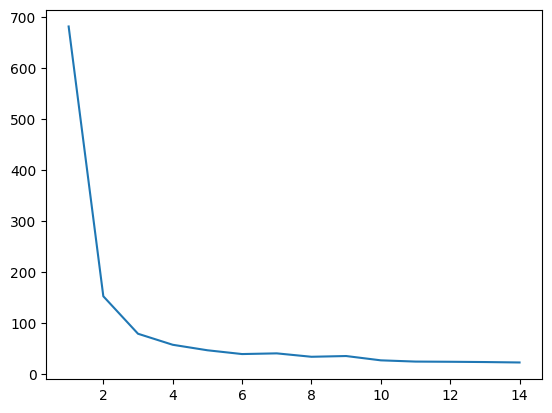

In [94]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercia)

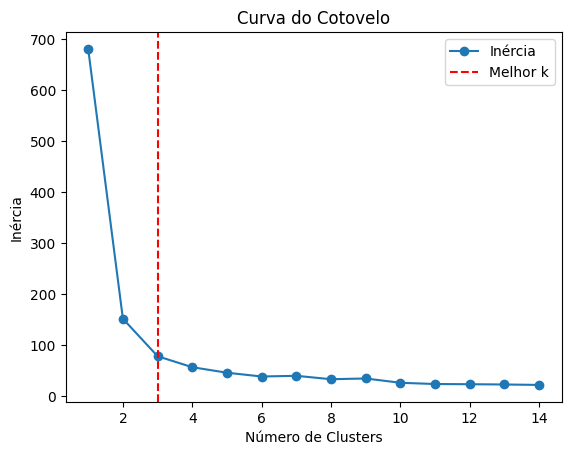

In [95]:
# Calcular a primeira e a segunda derivada (diferenças)
primeira_derivada = np.diff(inercia)
segunda_derivada = np.diff(primeira_derivada)

# Encontrar o índice do ponto de cotovelo usando a segunda derivada
best_k_index = np.argmax(segunda_derivada) + 2  # +1 para ajustar o índice devido ao uso de np.diff
best_k = valores_k[best_k_index]

# Plotar a curva do cotovelo com derivadas
fig, ax = plt.subplots()
ax.plot(valores_k, inercia, marker='o', label='Inércia')
ax.axvline(x=best_k, color='red', linestyle='--', label='Melhor k')
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('Inércia')
ax.set_title('Curva do Cotovelo')

# Adicionar primeira e segunda derivadas ao gráfico para visualização
# ax.plot(valores_k[1:], primeira_derivada, marker='x', linestyle='-', color='orange', label='1ª Derivada')
# ax.plot(valores_k[2:], segunda_derivada, marker='x', linestyle='-', color='green', label='2ª Derivada')
ax.legend()

plt.show()

In [96]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [97]:
centroids = kmeans.cluster_centers_
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

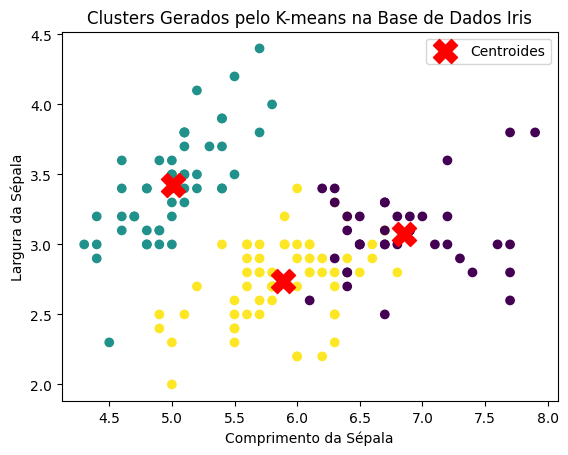

In [98]:
# Plotando os clusters
y_labels = kmeans.labels_
plt.scatter(x[:, 0], x[:, 1], c=y_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='red', label='Centroides')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Clusters Gerados pelo K-means na Base de Dados Iris')
plt.legend()
plt.show()

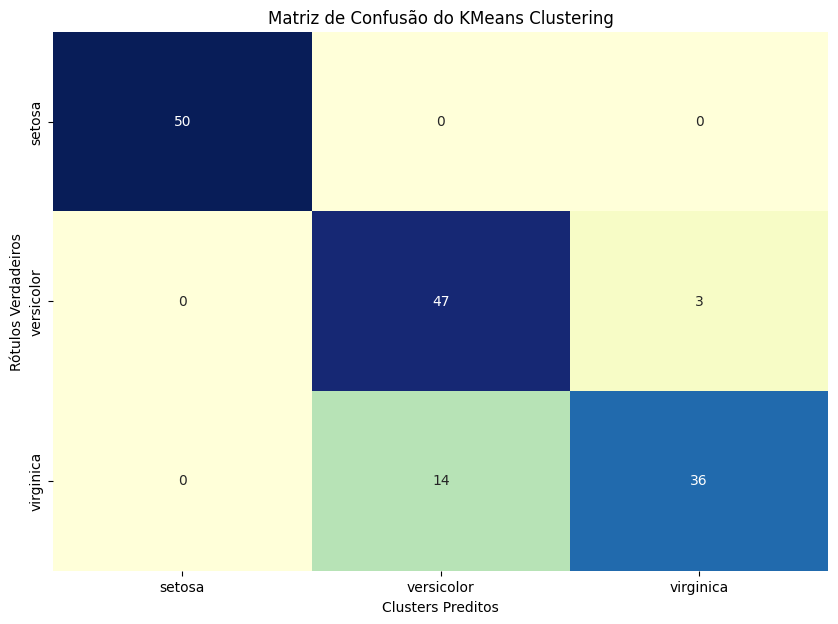

Matriz de Confusão:
             setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          47          3
virginica        0          14         36


In [99]:
# Mapear os clusters aos rótulos verdadeiros
labels = np.zeros_like(y_labels)
for i in range(3):
    mask = (y_labels == i)
    labels[mask] = mode(y[mask])[0]

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y, labels)

# Criar um DataFrame da matriz de confusão
df_conf_matrix = pd.DataFrame(conf_matrix, index=iris.target_names, columns=iris.target_names)

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(df_conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Matriz de Confusão do KMeans Clustering')
plt.xlabel('Clusters Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

print("Matriz de Confusão:\n", df_conf_matrix)

Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.89


C:\Users\erikp\AppData\Local\Temp\ipykernel_2344\1464827974.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Métrica', y='Valor', data=df_metrics, palette='viridis')


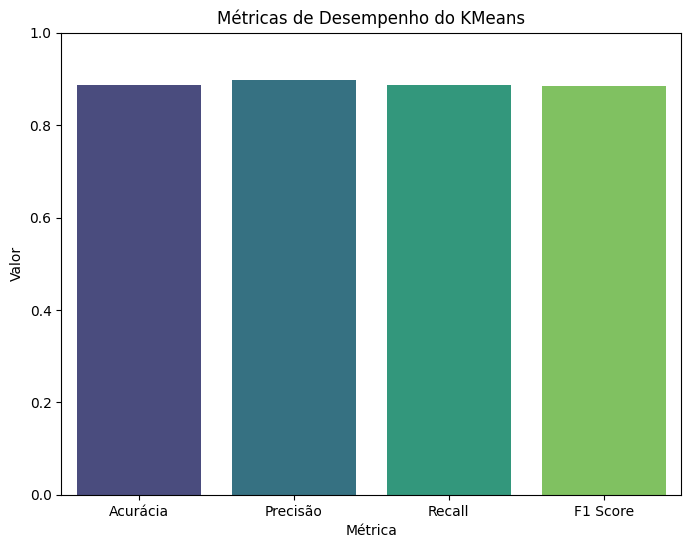

In [100]:
# Calcular as métricas de desempenho
accuracy = accuracy_score(y, labels)
precision = precision_score(y, labels, average='weighted')
recall = recall_score(y, labels, average='weighted')
f1 = f1_score(y, labels, average='weighted')

# Exibir as métricas de desempenho
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Criar um DataFrame com as métricas de desempenho
metrics = {
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1 Score'],
    'Valor': [accuracy, precision, recall, f1]
}
df_metrics = pd.DataFrame(metrics)

# Plotar as métricas de desempenho
plt.figure(figsize=(8, 6))
sns.barplot(x='Métrica', y='Valor', data=df_metrics, palette='viridis')
plt.title('Métricas de Desempenho do KMeans')
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.show()